<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 2**


Name : Rishi Kaul

UID : 2018130019

Objective: To implement and use Principal Component Analysis using Python Platform

Outcomes:

1. To learn how PCA is to identify an underlying structure or pattern beneath set of multivariate data.

2. To interpret the results of evaluated components

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dataset

In [ ]:
# reading csv
data = pd.read_csv('/content/drive/My Drive/Datasets/horse.csv')

In [ ]:
# printing head of dataset
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
# printing shapre or dimensions of data
data.shape

(299, 28)

In [ ]:
# printing the column datatypes to get an understanding of categorical and numerical columns
data.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [ ]:
# checking missing values present in the dataset
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# columns having more than 50 % of null values
delete_cols = ['nasogastric_reflux_ph', 'abdomo_appearance',
       'abdomo_protein']

In [ ]:
# dropping above mentioned columns 
df = data.drop(delete_cols, axis = 1)

# **EDA**

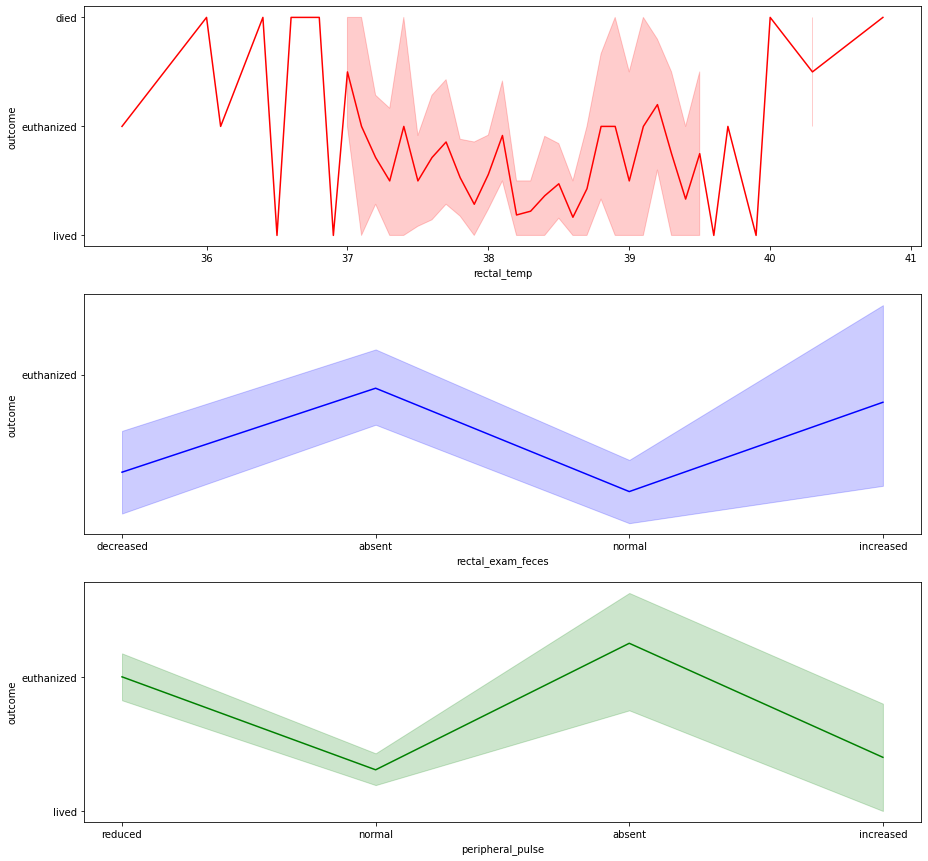

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x=df['rectal_temp'],y=df.outcome,ax=ax[0],color='r') #We visualize 3 features with different levels of correlation with outcome
sns.lineplot(x=df['rectal_exam_feces'],y=df.outcome,ax=ax[1],color='b')
sns.lineplot(x=df['peripheral_pulse'],y=df.outcome,ax=ax[2],color='g')

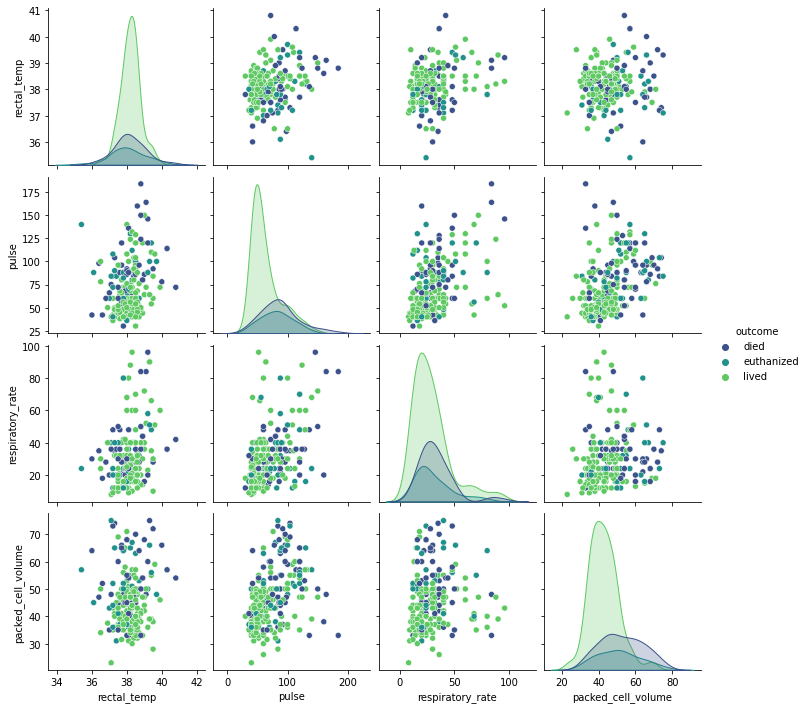

In [ ]:
#We can see a clear correlation for example with high packed cell volume meaning no survival (the same with pulse not with resprate)
chosen_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sns.pairplot(df[chosen_cols], hue='outcome', palette = 'viridis'); 

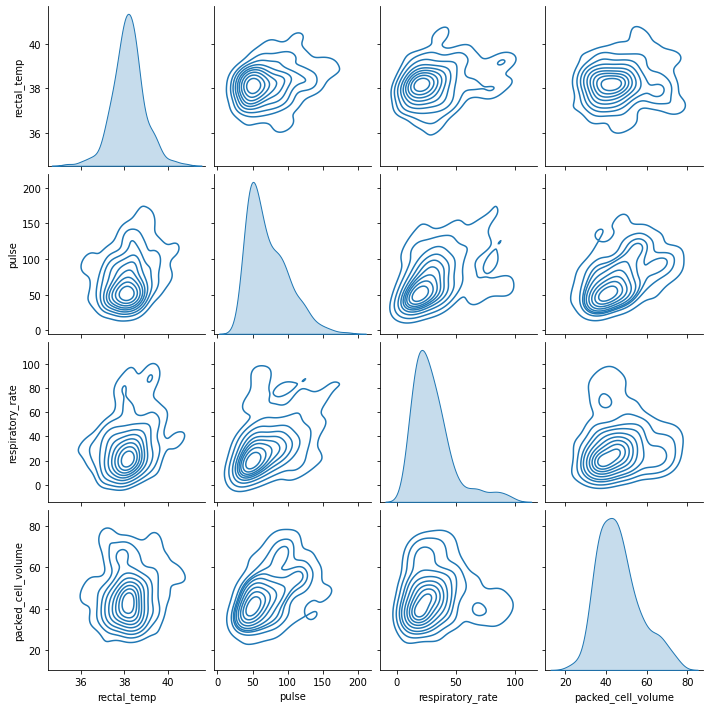

In [ ]:
sns.pairplot(df[chosen_cols], kind="kde"); #This graph helps us show where most values are concentrated in some numerical features

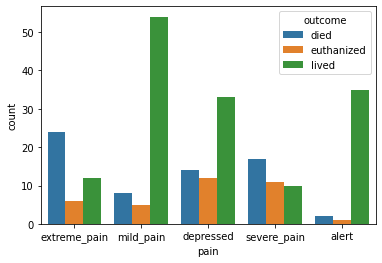

In [ ]:
sns.countplot(data=df, x='pain', hue = 'outcome') #We can see how the bigger the pain, the less the chance of survival

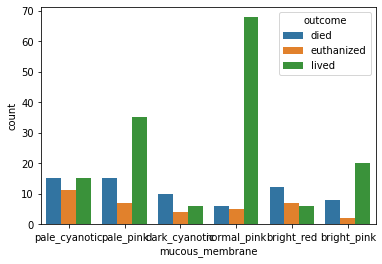

In [ ]:
sns.countplot(data=df, x='mucous_membrane', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

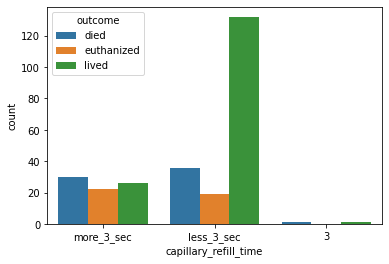

In [ ]:
sns.countplot(data=df, x='capillary_refill_time', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

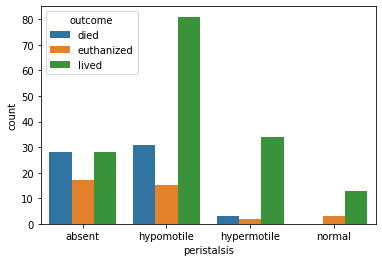

In [ ]:
sns.countplot(data=df, x='peristalsis', hue = 'outcome') #the lesser the activity on the horses gut the lesser the chance of survival

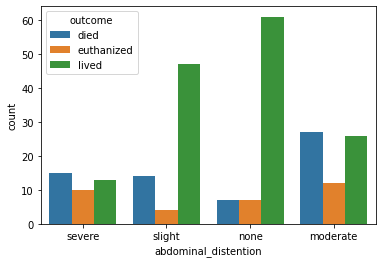

In [ ]:
sns.countplot(data=df, x='abdominal_distention', hue = 'outcome') #the more distended the abdomen the lesser the chance of survival (it means more pain like the documentation says)

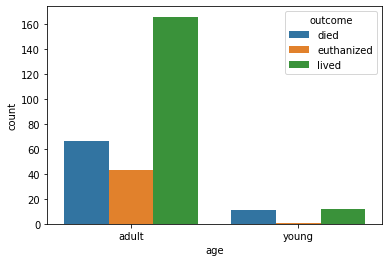

In [ ]:
sns.countplot(data=df, x='age', hue = 'outcome') #surprisingly, the age of the horse doesn't have a big impact on the outcome of the surgery
#however younger horses tend to survive less

In [ ]:
# for numerical columns filling the misssing values with their mean
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    df[column].fillna(df[column].mean(),inplace=True)

In [ ]:
# for categorical columns filling the missing values with their most frequent value
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].value_counts().index[0],inplace=True)

In [ ]:
# checking missing values after cleaning the dataset
df.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [ ]:
# for encoding the data, instantializing ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
oe_auto = OrdinalEncoder()

In [ ]:
# columns that do not have any logical order for encoding
cols_auto_encoding = ['surgery', 'outcome', 'surgical_lesion', 'cp_data']

In [ ]:
# encoding the above column data
df[cols_auto_encoding] = oe_auto.fit_transform(df[cols_auto_encoding])

In [ ]:
# ordinal encoding categories which have logical order for encoding
age = ['adult','young']
temp_of_extremities = ['cold','cool','normal','warm']
peripheral_pulse = ['absent','reduced','normal','increased']
mucous_membrane = ['normal_pink', 'bright_pink', 'pale_pink','pale_cyanotic','bright_red','dark_cyanotic']
capillary_refill_time = ['less_3_sec','3','more_3_sec']
pain = ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']
peristalsis = ['absent','hypomotile', 'normal', 'hypermotile']
abdominal_distention = ['none', 'slight','moderate', 'severe']
nasogastric_tube = ['none', 'slight', 'significant']
nasogastric_reflux = ['none', 'less_1_liter','more_1_liter']
rectal_exam_feces = ['absent','decreased', 'normal', 'increased']
abdomen = ['normal', 'other', 'firm', 'distend_small', 'distend_large']

In [ ]:
# adding the above mentioned columns to the list below
cols_custom_encoding = ['age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen']

In [ ]:

oe_custom = OrdinalEncoder(categories=[age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen])

In [ ]:
# applying ordinal encoding to the above mentioned columns
df[cols_custom_encoding] = oe_custom.fit_transform(df[cols_custom_encoding])

In [ ]:
# printing the head after encoding
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,0.0,530101,38.5,66.0,28.0,1.0,1.0,0.0,2.0,4.0,0.0,3.0,1.0,0.0,1.0,4.0,45.0,8.4,0.0,0.0,11300,0,0,0.0
1,1.0,0.0,534817,39.2,88.0,20.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,50.0,85.0,1.0,0.0,2208,0,0,0.0
2,0.0,0.0,530334,38.3,40.0,24.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,33.0,6.7,2.0,0.0,0,0,0,1.0
3,1.0,1.0,5290409,39.1,164.0,84.0,0.0,2.0,5.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,48.0,7.2,0.0,1.0,2208,0,0,1.0
4,0.0,0.0,530255,37.3,104.0,35.0,1.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0,74.0,7.4,0.0,0.0,4300,0,0,0.0


In [ ]:
# printing general info such as datatype, missing values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    299 non-null    float64
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    float64
 7   peripheral_pulse       299 non-null    float64
 8   mucous_membrane        299 non-null    float64
 9   capillary_refill_time  299 non-null    float64
 10  pain                   299 non-null    float64
 11  peristalsis            299 non-null    float64
 12  abdominal_distention   299 non-null    float64
 13  nasogastric_tube       299 non-null    float64
 14  nasogastric_reflux     299 non-null    float64
 15  rectal

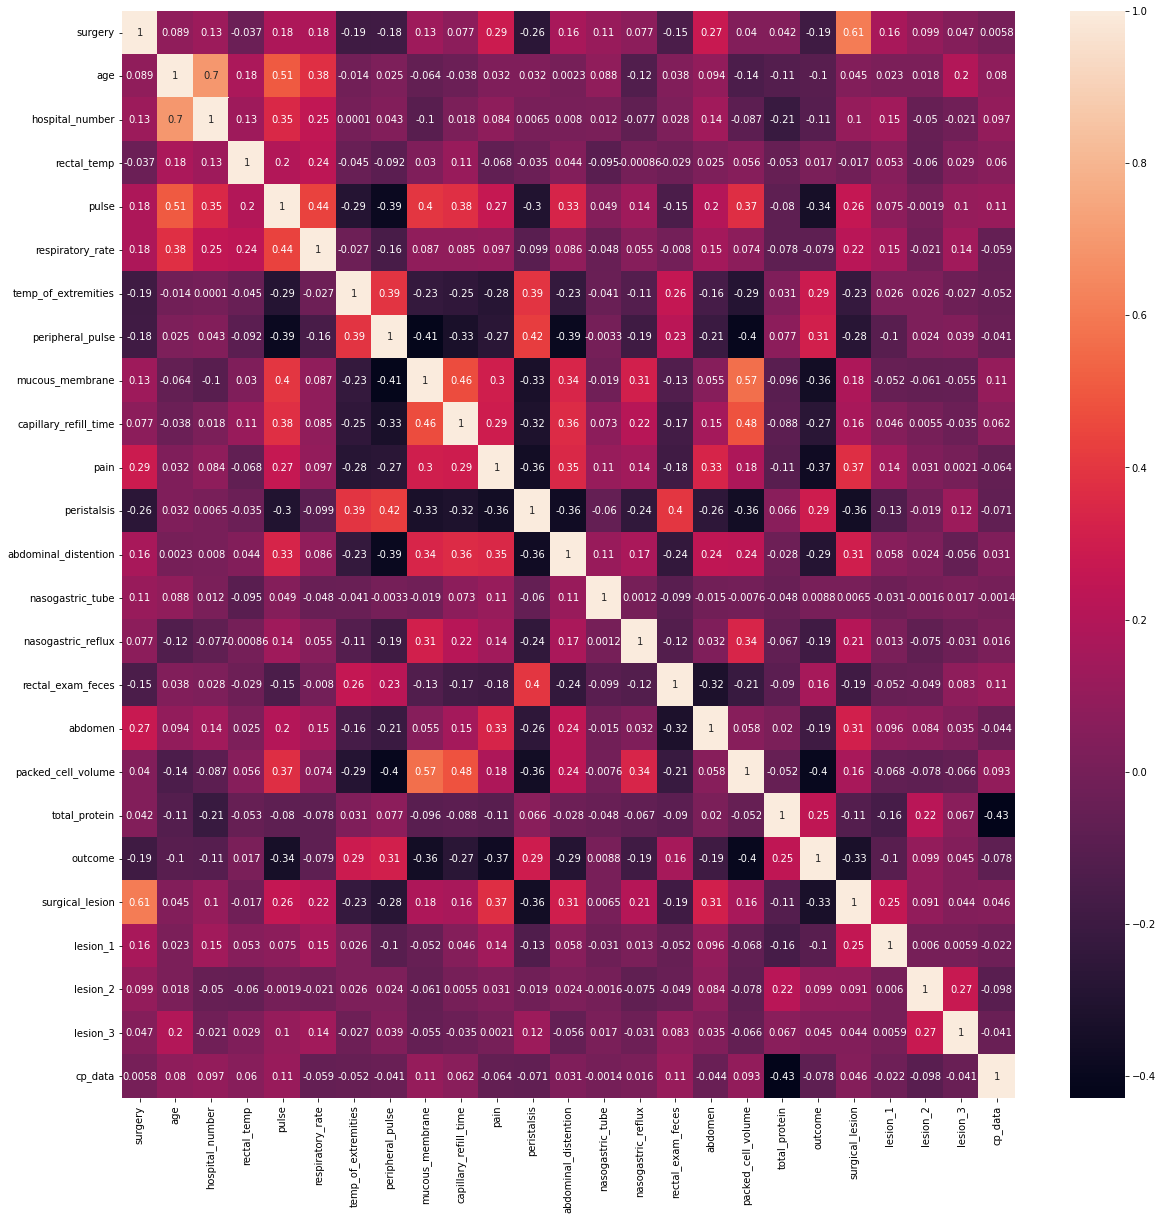

In [ ]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [ ]:
# Creating Target and Input Data
X=df.drop(['outcome'],axis=1)
y=df['outcome']

In [ ]:
# Splitting the data into train and test with test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 24), (90, 24), (209,), (90,))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
""" 
function acts like a pipeline for scaling 
and performing logistic regression along 
with printing the classification report
"""
def train_tasks(df, scale):
  # Creating Target and Input Data
  X=df.drop(['outcome'],axis=1)
  y=df['outcome']
  if scale:
    restore = X.columns
    scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    X = pd.DataFrame(scaled)
    X.columns = restore
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 22)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  lr = LogisticRegression() #solver='newton-cg',max_iter=500
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  predicted_probas = lr.predict_proba(X_test)
  print(classification_report(y_test, y_pred))
  return y_pred, y_test, predicted_probas


In [ ]:
# instantializing logsitic regression model
y_pred, y_test, predicted_probas = train_tasks(df, True)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65        22
         1.0       0.22      0.15      0.18        13
         2.0       0.71      0.82      0.76        55

    accuracy                           0.67        90
   macro avg       0.55      0.52      0.53        90
weighted avg       0.65      0.67      0.65        90

Logistic Regression accuracy score with all the features: 0.6667


In [ ]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))
# It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.
pca.explained_variance_ratio_

array([0.20805813, 0.10537261, 0.0773083 , 0.06535345, 0.05330135])

In [ ]:
pca_df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5'])

In [ ]:
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,3.376753,-1.662315,0.051411,-1.388453,0.554420
1,-2.224577,-1.094126,1.202033,-0.717406,-0.730681
2,0.435951,-0.415407,-0.453364,2.244444,-0.477776
3,3.690445,-1.739016,-0.700989,-0.586999,-1.199158
4,3.316768,-0.199340,0.044300,0.431188,-1.661306


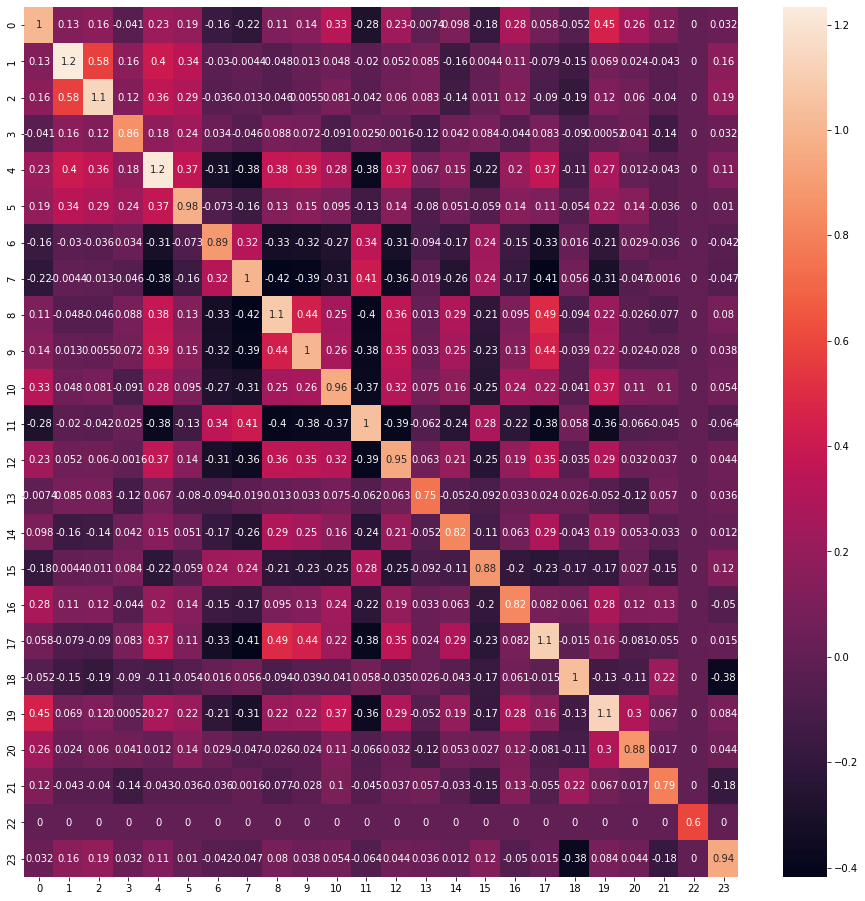

In [ ]:
# covariance matrix
cov = pca.get_covariance()
plt.figure(figsize = (16,16))
sns.heatmap(cov, annot=True)

In [ ]:
pca = PCA(n_components=5)
clf = LogisticRegression() 
scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('pca', pca), ('logistic', clf)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Logistic Regression accuracy score with 5 principal components: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with 5 principal components: 0.7333


## Conclusion

In this experiment, I have understood and performed Principal Component Analysis – the most popular dimensionality reduction technique. I have demonstrated PCA implementation with Logistic Regression on the horse colic dataset. I reduced the dimensions to 5 and got an increase in accuracy from 0.67 to 0.73. By practising this I can also relate to the time when I had dealt with datasets such as House Price Rate Prediction which had a large number of features. Applying PCA to such algorithms would have given a clear boost to the accuracy that I had achieved at that time. Thus, PCA is a good fit for datasets such as these.

